In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Unprocessed_data.csv")

In [3]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [5]:
df.shape

(48204, 9)

## Preprocessing

In [6]:
df_copy = df.copy()

In [7]:
df_copy.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'traffic_volume'],
      dtype='object')

In [8]:
df_copy.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [9]:
independentColumns=['holiday','weather_main','weather_description']
for uniquevalue in independentColumns:
  print(df_copy[uniquevalue].unique())  
  print("There are {} values in {} Column".format(len(df_copy[uniquevalue].unique()),uniquevalue))
  print("*****************************************************")
  print("\n")

['None' 'Columbus Day' 'Veterans Day' 'Thanksgiving Day' 'Christmas Day'
 'New Years Day' 'Washingtons Birthday' 'Memorial Day' 'Independence Day'
 'State Fair' 'Labor Day' 'Martin Luther King Jr Day']
There are 12 values in holiday Column
*****************************************************


['Clouds' 'Clear' 'Rain' 'Drizzle' 'Mist' 'Haze' 'Fog' 'Thunderstorm'
 'Snow' 'Squall' 'Smoke']
There are 11 values in weather_main Column
*****************************************************


['scattered clouds' 'broken clouds' 'overcast clouds' 'sky is clear'
 'few clouds' 'light rain' 'light intensity drizzle' 'mist' 'haze' 'fog'
 'proximity shower rain' 'drizzle' 'moderate rain' 'heavy intensity rain'
 'proximity thunderstorm' 'thunderstorm with light rain'
 'proximity thunderstorm with rain' 'heavy snow' 'heavy intensity drizzle'
 'snow' 'thunderstorm with heavy rain' 'freezing rain' 'shower snow'
 'light rain and snow' 'light intensity shower rain' 'SQUALLS'
 'thunderstorm with rain' 'pr

In [10]:
# Examine the value
print(df_copy.rain_1h)
print("*****************************************************")
print(df_copy.snow_1h)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
48199    0.0
48200    0.0
48201    0.0
48202    0.0
48203    0.0
Name: rain_1h, Length: 48204, dtype: float64
*****************************************************
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
48199    0.0
48200    0.0
48201    0.0
48202    0.0
48203    0.0
Name: snow_1h, Length: 48204, dtype: float64


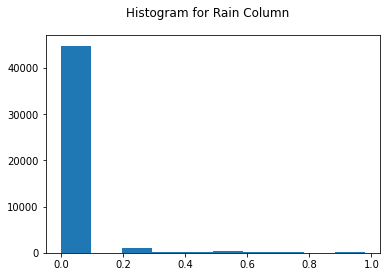

In [11]:
fig = plt.figure()  
fig.suptitle('Histogram for Rain Column')
plt.hist(df_copy.rain_1h.loc[df_copy.rain_1h<1])
plt.show()

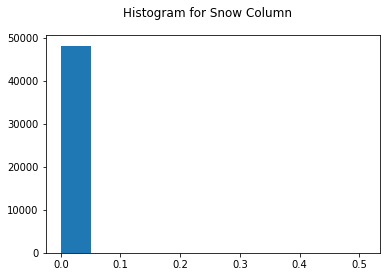

In [12]:
fig = plt.figure()  
fig.suptitle('Histogram for Snow Column')
plt.hist(df_copy.snow_1h.loc[df_copy.snow_1h<1])
plt.show()

In [13]:
df_copy.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [14]:
df_copy['date_time'] = pd.to_datetime(df_copy.date_time)
df_copy['weekday'] = df_copy.date_time.dt.weekday
df_copy['date'] = df_copy.date_time.dt.date
df_copy['hour'] = df_copy.date_time.dt.hour
df_copy['month'] = df_copy.date_time.dt.month
df_copy['year'] = df_copy.date_time.dt.year

In [15]:
df_copy.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,weekday,date,hour,month,year
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,1,2012-10-02,9,10,2012
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,1,2012-10-02,10,10,2012
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,1,2012-10-02,11,10,2012
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,1,2012-10-02,12,10,2012
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,1,2012-10-02,13,10,2012


In [16]:
df_copy.weekday.unique()

array([1, 2, 3, 4, 5, 6, 0])

In [17]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
 9   weekday              48204 non-null  int64         
 10  date                 48204 non-null  object        
 11  hour                 48204 non-null  int64         
 12  month                48204 non-null  int64         
 13  year                 48204 non-

In [18]:
df_copy['rain_1h'] = df_copy['rain_1h'].astype(float, errors = 'raise')

In [19]:
df_copy['snow_1h'] = df_copy['snow_1h'].astype(float, errors = 'raise')

In [20]:
def modify_snow1h(x):
    if x==0:
        return 'No_Snow'
    else:
        return 'Snow'
    
df_copy['snow_1h'] = df_copy.snow_1h.map(modify_snow1h)

In [21]:
def modify_rain1h(x):
    if x<=0.2:
        return 'No_rain'
    else:
        return 'Rain'
    
df_copy['rain_1h'] = df_copy.rain_1h.map(modify_rain1h)

In [22]:
df_copy['weather_description'] = df_copy['weather_description'].map(lambda x:x.lower())
weather = ['thunderstorm','mist','fog','haze']
df_copy.loc[np.logical_not(df_copy['weather_description'].isin(weather)),'weather_description'] = 'other'

In [23]:
df_copy.weather_description.unique()

array(['other', 'mist', 'haze', 'fog', 'thunderstorm'], dtype=object)

In [24]:
df_copy.weather_main.unique()

array(['Clouds', 'Clear', 'Rain', 'Drizzle', 'Mist', 'Haze', 'Fog',
       'Thunderstorm', 'Snow', 'Squall', 'Smoke'], dtype=object)

In [25]:
df_copy.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,weekday,date,hour,month,year
0,None,288.28,No_rain,No_Snow,40,Clouds,other,2012-10-02 09:00:00,5545,1,2012-10-02,9,10,2012
1,None,289.36,No_rain,No_Snow,75,Clouds,other,2012-10-02 10:00:00,4516,1,2012-10-02,10,10,2012
2,None,289.58,No_rain,No_Snow,90,Clouds,other,2012-10-02 11:00:00,4767,1,2012-10-02,11,10,2012
3,None,290.13,No_rain,No_Snow,90,Clouds,other,2012-10-02 12:00:00,5026,1,2012-10-02,12,10,2012
4,None,291.14,No_rain,No_Snow,75,Clouds,other,2012-10-02 13:00:00,4918,1,2012-10-02,13,10,2012


In [26]:
min(df_copy.temp)

0.0

In [27]:
max(df_copy.temp)

310.07

In [28]:
def kelvinToCelsius(kelvin):
    return kelvin - 273.15

df_copy['temp'] = df_copy.temp.map(kelvinToCelsius)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


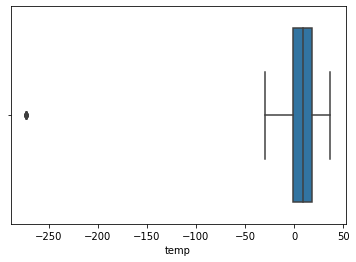

In [29]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.boxplot('temp', data = df_copy)
plt.show()

In [30]:
#Finding outlier index
print(np.where(df_copy['temp']<-50))

(array([11898, 11899, 11900, 11901, 11946, 11947, 11948, 11949, 11950,
       11951]),)


In [31]:
# IQR
Q1 = np.percentile(df_copy['temp'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df_copy['temp'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df_copy.shape)
 
# Upper bound
upper = np.where(df_copy['temp'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df_copy['temp'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df_copy.drop(upper[0], inplace = True)
df_copy.drop(lower[0], inplace = True)
 
print("New Shape: ", df_copy.shape)

Old Shape:  (48204, 14)
New Shape:  (48194, 14)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


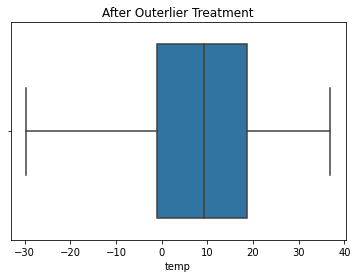

In [32]:
plt.figure(figsize=(6,4))
sns.boxplot('temp', data = df_copy)
plt.title("After Outerlier Treatment")
plt.show()

In [33]:
df_copy.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,weekday,date,hour,month,year
0,None,15.13,No_rain,No_Snow,40,Clouds,other,2012-10-02 09:00:00,5545,1,2012-10-02,9,10,2012
1,None,16.21,No_rain,No_Snow,75,Clouds,other,2012-10-02 10:00:00,4516,1,2012-10-02,10,10,2012
2,None,16.43,No_rain,No_Snow,90,Clouds,other,2012-10-02 11:00:00,4767,1,2012-10-02,11,10,2012
3,None,16.98,No_rain,No_Snow,90,Clouds,other,2012-10-02 12:00:00,5026,1,2012-10-02,12,10,2012
4,None,17.99,No_rain,No_Snow,75,Clouds,other,2012-10-02 13:00:00,4918,1,2012-10-02,13,10,2012


In [34]:
def modify_holiday(x):
    if x == 'None':
        return "No_Holiday"
    else:
        return "Holiday"
df_copy['holiday'] = df_copy['holiday'].map(modify_holiday)

In [35]:
# Resetting Data
df_copy.set_index('date', inplace = True)

In [36]:
df_copy.drop(['date_time'], axis = 1,inplace=True)

In [37]:
df_copy.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,weekday,hour,month,year
date,,,,,,,,,,,,
2012-10-02,No_Holiday,15.13,No_rain,No_Snow,40,Clouds,other,5545,1,9,10,2012
2012-10-02,No_Holiday,16.21,No_rain,No_Snow,75,Clouds,other,4516,1,10,10,2012
2012-10-02,No_Holiday,16.43,No_rain,No_Snow,90,Clouds,other,4767,1,11,10,2012
2012-10-02,No_Holiday,16.98,No_rain,No_Snow,90,Clouds,other,5026,1,12,10,2012
2012-10-02,No_Holiday,17.99,No_rain,No_Snow,75,Clouds,other,4918,1,13,10,2012


In [38]:
df_copy.holiday.unique()

array(['No_Holiday', 'Holiday'], dtype=object)

In [39]:
df_copy.clouds_all.unique()

array([ 40,  75,  90,   1,  20,   0, 100,  92,  99,  81,  50,  72,  56,
        57,  93,  85,  68,  87,  91,  96,  48,  60,   8,  38,  46,  98,
        86,  16,   6,  59,  54,  89,  78,  36,  17,  58,  63,  42,  25,
        11,  13,  83,  70,  84,   3,  77,  88,  67,  97,  62,  32,   4,
         5,   2,  44,  24,  76,  64,  80,  12])

In [40]:
min(df["clouds_all"])


0

In [41]:
max(df["clouds_all"])

100

In [42]:
# Pre-Processing Done
df_final = df_copy.copy()

In [43]:
df_final.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,weekday,hour,month,year
date,,,,,,,,,,,,
2012-10-02,No_Holiday,15.13,No_rain,No_Snow,40,Clouds,other,5545,1,9,10,2012
2012-10-02,No_Holiday,16.21,No_rain,No_Snow,75,Clouds,other,4516,1,10,10,2012
2012-10-02,No_Holiday,16.43,No_rain,No_Snow,90,Clouds,other,4767,1,11,10,2012
2012-10-02,No_Holiday,16.98,No_rain,No_Snow,90,Clouds,other,5026,1,12,10,2012
2012-10-02,No_Holiday,17.99,No_rain,No_Snow,75,Clouds,other,4918,1,13,10,2012


In [44]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48194 entries, 2012-10-02 to 2018-09-30
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48194 non-null  object 
 1   temp                 48194 non-null  float64
 2   rain_1h              48194 non-null  object 
 3   snow_1h              48194 non-null  object 
 4   clouds_all           48194 non-null  int64  
 5   weather_main         48194 non-null  object 
 6   weather_description  48194 non-null  object 
 7   traffic_volume       48194 non-null  int64  
 8   weekday              48194 non-null  int64  
 9   hour                 48194 non-null  int64  
 10  month                48194 non-null  int64  
 11  year                 48194 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 4.8+ MB


# Model Building

In [56]:
df_final.head(50)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,weekday,hour,month,year
date,,,,,,,,,,,,
2012-10-02,1,15.13,0,0,40,1,3,5545,1,9,9,2012
2012-10-02,1,16.21,0,0,75,1,3,4516,1,10,9,2012
2012-10-02,1,16.43,0,0,90,1,3,4767,1,11,9,2012
2012-10-02,1,16.98,0,0,90,1,3,5026,1,12,9,2012
2012-10-02,1,17.99,0,0,75,1,3,4918,1,13,9,2012
2012-10-02,1,18.57,0,0,1,0,3,5181,1,14,9,2012
2012-10-02,1,20.02,0,0,1,0,3,5584,1,15,9,2012
2012-10-02,1,20.71,0,0,1,0,3,6015,1,16,9,2012
2012-10-02,1,20.99,0,0,20,1,3,5791,1,17,9,2012


In [57]:
df_copy.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,weekday,hour,month,year
date,,,,,,,,,,,,
2012-10-02,No_Holiday,15.13,No_rain,No_Snow,40,Clouds,other,5545,1,9,10,2012
2012-10-02,No_Holiday,16.21,No_rain,No_Snow,75,Clouds,other,4516,1,10,10,2012
2012-10-02,No_Holiday,16.43,No_rain,No_Snow,90,Clouds,other,4767,1,11,10,2012
2012-10-02,No_Holiday,16.98,No_rain,No_Snow,90,Clouds,other,5026,1,12,10,2012
2012-10-02,No_Holiday,17.99,No_rain,No_Snow,75,Clouds,other,4918,1,13,10,2012


In [59]:
df_copy.holiday.unique()

array(['No_Holiday', 'Holiday'], dtype=object)

In [60]:
df_copy.rain_1h.unique()

array(['No_rain', 'Rain'], dtype=object)

In [65]:
df_copy.weather_main.unique()

array(['Clouds', 'Clear', 'Rain', 'Drizzle', 'Mist', 'Haze', 'Fog',
       'Thunderstorm', 'Snow', 'Squall', 'Smoke'], dtype=object)

In [66]:
df_copy.weather_description.unique()

array(['other', 'mist', 'haze', 'fog', 'thunderstorm'], dtype=object)

In [ ]:
holiday:[No_holiday = 1,Holiday = 0]
rain1h:[No_rain = 0,Rain = 1]
snow_1h:[No_snow = 0,Snow = 1]
weather_main:[]
weather_description:[]


In [46]:
numVars = ['temp','clouds_all','year']
catVars = ['holiday','rain_1h','snow_1h','weather_main','weather_description','weekday','hour','month']

In [48]:
from sklearn import preprocessing


label_encoder = preprocessing.LabelEncoder()
for values in catVars:
  df_final[values]= label_encoder.fit_transform(df_final[values])

In [49]:
label_encoder.classes_

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
df_final.head()

In [ ]:
X = df_final[['holiday','temp','rain_1h','snow_1h','clouds_all','weather_main','weather_description','weekday','hour','month','year']]
y = df_final[['traffic_volume']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42
)

In [ ]:
# Model selection #
#We will save the model performance metrics in a DataFrame
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
Model = []
RMSE = []
R_sq = []
cv = KFold(5)

#Creating a Function to append the cross validation scores of the algorithms
def input_scores(name, model, x, y):
    Model.append(name)
    RMSE.append(np.sqrt((-1) * cross_val_score(model, x, y, cv=cv, 
                                               scoring='neg_mean_squared_error').mean()))
    R_sq.append(cross_val_score(model, x, y, cv=cv, scoring='r2').mean())


In [ ]:
Model

In [ ]:
X_train

In [ ]:
y_train.values.ravel()

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, 
                              AdaBoostRegressor)

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor', 
         'Random Forest Regressor', 'Gradient Boosting Regressor',
         'Adaboost Regressor']
models = [LinearRegression(), Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor(),
          RandomForestRegressor(), GradientBoostingRegressor(), 
          AdaBoostRegressor()]

#Running all algorithms
for name, model in zip(names, models):
    input_scores(name, model, X_train, y_train.values.ravel())

In [ ]:
evaluation = pd.DataFrame({'Model': Model,
                           'RMSE': RMSE,
                           'R Squared': R_sq})
print("FOLLOWING ARE THE TRAINING SCORES: ")
evaluation

In [ ]:
df_pipe = df_copy.copy()

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

 
onehot_encoder = OneHotEncoder()
scaler = StandardScaler()

colTrans = make_column_transformer(
    (onehot_encoder,catVars),
    (scaler,numVars),
    remainder='passthrough')

In [ ]:
colTrans.fit_transform(df_pipe)

# Hybrid Machine learning Model

*   Decision Tree Regressor	
*   Random Forest Regressor
*  Gradient Boosting Regressor


In [ ]:
from sklearn.ensemble import StackingRegressor

baseEstimators = [
    ('DTR', DecisionTreeRegressor()),
    ('GBR', RandomForestRegressor())
]
hybridModel = StackingRegressor(
    estimators=baseEstimators,
    final_estimator=GradientBoostingRegressor()
)

In [ ]:
hybridModel.fit(X_train, y_train.values.ravel()).score(X_test, y_test)

In [ ]:
y_pred = hybridModel.predict(X_test)

In [ ]:
print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, hybridModel.predict(X_test))))
print("Test R^2: ", r2_score(y_test, hybridModel.predict(X_test)))

In [ ]:
# To check the prediction and closeness of predict data 
plt.figure(figsize=(10, 10))

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value") # hist=True
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.show()
plt.close()

In [ ]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

## Explanation
> FOLLOWING ARE THE TRAINING SCORES OF SINGLE MACHINE LEARNING MODEL : 

          | Model                       | RMSE   | R^2  |
          |-----------------------------|--------|------|
          | Decision Tree Regressor     | 587.10 | 0.91 |
          | Random Forest Regressor     | 438.81 | 0.95 |
          | Gradient Boosting Regressor | 575.2  | 0.91 |
 > AFTER COMBINING MULTIPLE MACHINE LEARNING MODEL :
- RMSE : 410.68
- R_Score : 0.957







# Pipeline and Column Transformer
$**Under Process**$

In [ ]:
numVars = ['temp','clouds_all','year']
catVars = ['holiday','rain_1h','snow_1h','weather_main','weather_description','weekday','hour','month']

In [67]:
StackingRegressor(
    estimators=baseEstimators,
    final_estimator=GradientBoostingRegressor())

NameError: ignored

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder


# numVars_Transformer = StandardScaler()
# catVars_Transformer = OneHotEncoder()

# preprocessor = ColumnTransformer(
#     transformers=[
#         ("NumVari", numVars_Transformer, numVars),
#         ("CatVari", catVars_Transformer, catVars),
#     ]
# )

pipe = Pipeline(
    steps=[("preprocessor", colTrans), ("Model", StackingRegressor(
    estimators=baseEstimators,
    final_estimator=GradientBoostingRegressor()))]
)

pipe.fit(X_train, y_train.values.ravel())
print("model score: %.3f" % pipe.score(X_test, y_test))

In [ ]:
pipe